In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Convolution2D,Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Root folder of the dataset
# Dataset URL-> https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
datasetFolderName='DS2'
# Model file name for saving
MODEL_FILENAME="imageClassificationModel.h5"
# Input image dimensions
img_rows, img_cols, numOfChannels =  100, 100, 1
# Train, Validation, and Test data path
train_path=datasetFolderName+'/train/'
validation_path=datasetFolderName+'/validation/'
test_path=datasetFolderName+'/test/'

In [3]:
def showResults(test, pred):
    target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(test, pred)
    print(cm)    

In [4]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                # validation_split=0.1,
                # shear_range=0.05,
            	# horizontal_flip=True,
        		# rotation_range=30,
        		# zoom_range=0.20,
                # zca_whitening=True,
            	fill_mode="nearest"
                )
validation_datagen = ImageDataGenerator(
                rescale=1./255,
                # shear_range=0.05,
            	# horizontal_flip=True,
        		# rotation_range=30,
        		# zoom_range=0.20,
                # zca_whitening=True,
            	fill_mode="nearest"
                )
test_datagen = ImageDataGenerator(rescale=1./255)

activationFunction='relu'
batch_size = 16
epoch=20

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode="grayscale")

validation_generator = train_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode="grayscale")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode=None,  # only data, no labels
        shuffle=False)

Found 5216 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 540 images belonging to 2 classes.


In [5]:
def getModel():
    model = Sequential()
    
    model.add(Conv2D(100, kernel_size = (5, 5), activation=activationFunction, input_shape=(img_rows, img_cols, numOfChannels)))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(50, kernel_size=(3,3), activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(50, kernel_size=(3,3), activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation=activationFunction))
    model.add(Dropout(0.1))
    model.add(Dense(50, activation=activationFunction))
    model.add(Dense(2, activation = 'softmax'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = getModel()

In [6]:
checkpoint = ModelCheckpoint(MODEL_FILENAME,  # model filename
                             monitor='loss',
                             verbose=1, # verbosity - 0 or 1
                             save_best_only= True, 
                             mode='auto') 
early_stopping = EarlyStopping(monitor='loss',
                               patience=5,
                               verbose=1,
                               mode='auto')

# fit model
history=model.fit_generator(train_generator, 
                            epochs=epoch,
                            validation_data=validation_generator, 
                            callbacks=[checkpoint, early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 326 steps, validate for 7 steps
Epoch 1/20
325/326 [============================>.] - ETA: 1s - loss: 0.2136 - accuracy: 0.9135
Epoch 00001: loss improved from inf to 0.21407, saving model to imageClassificationModel.h5
326/326 [==============================] - 504s 2s/step - loss: 0.2141 - accuracy: 0.9135 - val_loss: 0.7003 - val_accuracy: 0.7700
Epoch 2/20
325/326 [============================>.] - ETA: 1s - loss: 0.1115 - accuracy: 0.9573
Epoch 00002: loss improved from 0.21407 to 0.11133, saving model to imageClassificationModel.h5
326/326 [==============================] - 435s 1s/step - loss: 0.1113 - accuracy: 0.9574 - val_loss: 1.1476 - val_accuracy: 0.7000
Epoch 3/20
325/326 [============================>.] - ETA: 1s - loss: 0.0936 - accuracy: 0.9667
Epoch 00003: loss improved from 0.11133 to 0.09396, saving model to imageClassificationModel

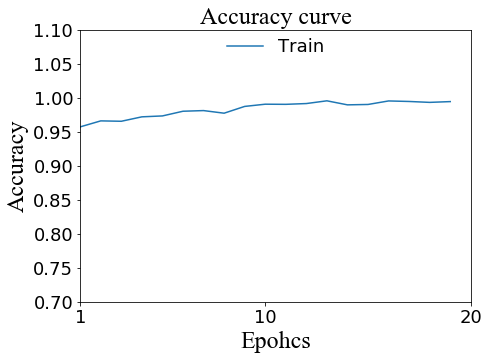

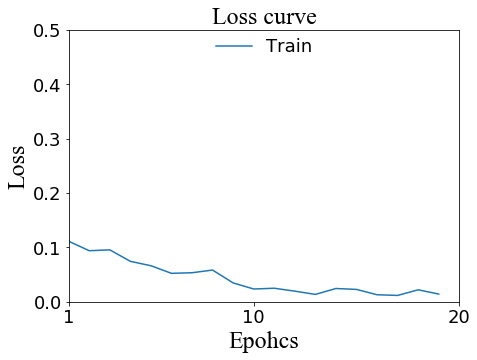

In [12]:
# Plot validation accuracy and loss
history.history['loss']
fig=plt.rc('figure', figsize=(7, 5))

fontLabels = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size': 24,
        }

axisLabelFont=18
#Validation Accuracy Plot   
plt.xticks([1,10,20], fontsize=axisLabelFont)
plt.yticks(fontsize=axisLabelFont)
plt.ylim(ymin=0.7,ymax=1.1) 
plt.xlim(xmin=1, xmax=20)
plt.plot(history.history['accuracy'])
plt.title('Accuracy curve', fontdict=fontLabels)
plt.ylabel('Accuracy', fontdict=fontLabels)
plt.xlabel('Epohcs', fontdict=fontLabels)
plt.legend(['Train'], loc='upper center', frameon=False, bbox_to_anchor=(0.50, 1.03), shadow=False, ncol=2, fontsize=axisLabelFont)
plt.show()

#Validation Loss Plot   
plt.xticks([1,10,20],fontsize=axisLabelFont)
plt.yticks(fontsize=axisLabelFont)
plt.ylim(ymin=0,ymax=0.5) 
plt.xlim(xmin=1, xmax=20)
plt.plot(history.history['loss'])
plt.title('Loss curve', fontdict=fontLabels)
plt.ylabel('Loss', fontdict=fontLabels)
plt.xlabel('Epohcs', fontdict=fontLabels)
plt.legend(['Train'], loc='upper center', frameon=False, bbox_to_anchor=(0.50, 1.03), shadow=False, ncol=2, fontsize=axisLabelFont)
plt.show()

In [13]:
# Testing/Prediction phase
predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
# Display the performance of the model on test data
showResults(true_classes[:len(yPredictions)], yPredictions)

34/34 [==============================] - 20s 583ms/step
Accuracy  : 0.75
Precision : 0.8144402551182212
f1Score : 0.7038192225068363
[[ 58 134]
 [  1 347]]
